In [1]:
# import all the typical toolboxes...
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import CoolProp.CoolProp as CP

#### CoolProp version...

Import cool prop.

Note all the fluids it can do are here: http://www.coolprop.org/fluid_properties/PurePseudoPure.html#list-of-fluids

Here are the high-level commands you'll likely need to start with: http://www.coolprop.org/coolprop/HighLevelAPI.html#

The rub with CoolProp is that it doesn't have heats (i.e., enthalpies) of formation, so it's really only of limited use for more advanced thermodynamic applications (i.e., think combustion applications).

Could also try the online version here: https://ibell.pythonanywhere.com/

In [2]:
# Let's try using some ideal gas properties
R = 8.314 #ideal gas const
T = {} # creates a spot for us to store temp data
T[1] = 300 #K
T[2] = 400 #K
P = 1e5 #Pa

# note dividing by 1000 b/c base units are J, kg, K, etc.
u_1 = CP.PropsSI('U','T',T[1],'P',P,'Air')/1000
h_1 = CP.PropsSI('H','T',T[1],'P',P,'Air')/1000
s_1 = CP.PropsSI('S','T',T[1],'P',P,'Air')/1000
cpair = CP.PropsSI('C','T',T[1],'P',P,'Air')/1000

print("the internal energy is %1.3f kJ/kg" % u_1)
print("the enthalpy is %1.3f kJ/kg" % h_1)
print("the entropy is %1.3f kJ/kgK" % s_1)
print('the specific heat capacity is %1.3f kJ/kgK' % cpair)

h_2 = CP.PropsSI('H','T',T[2],'P',P,'Air')/1000
dh = h_2-h_1
print("dh(300 to 400) = %1.3f kJ/kg" % dh)

the internal energy is 340.213 kJ/kg
the enthalpy is 426.301 kJ/kg
the entropy is 3.891 kJ/kgK
the specific heat capacity is 1.006 kJ/kgK
dh(300 to 400) = 100.955 kJ/kg


In [3]:
# Now let's try some water properties
den = CP.PropsSI('D','T',373,'Q',1,'Water') #[kg/m3] finding the density
sv = 1/den # finding the specific volume
print(f'The specific volume at T = 300K and a quality of 1 is {sv:0.4f} m3/kg')

The specific volume at T = 300K and a quality of 1 is 1.6802 m3/kg


In [6]:
# CoolProp can also just tell you the phase
CP.PhaseSI('T',600,'P',6e6,'Water')

'gas'

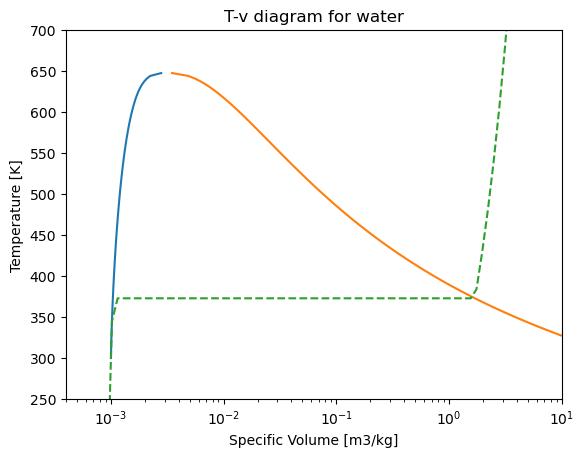

In [4]:
# Make an array of Temps...
TT = np.linspace(300,647, num=100) # note that weird things happen if you go too high or too low since there is no data there
svf = 1/CP.PropsSI('D','T',TT,'Q',0,'Water')
svg = 1/CP.PropsSI('D','T',TT,'Q',1,'Water')

# Make an isobar:
P = 1e5 #[Pa]
sv = np.logspace(-4,1,num=100)
T_P1e5 = CP.PropsSI('T','P',P,'D',1/sv,'Water') # 1bar isobar data

# Plot these values on a Tv diagram
fig, ax = plt.subplots()
ax.semilogx(svf,TT)
ax.semilogx(svg,TT)
ax.semilogx(sv,T_P1e5,'--')
plt.xlim([4e-4,10])
plt.ylim([250,700])
plt.title('T-v diagram for water')
plt.xlabel('Specific Volume [m3/kg]')
plt.ylabel('Temperature [K]')
plt.show()

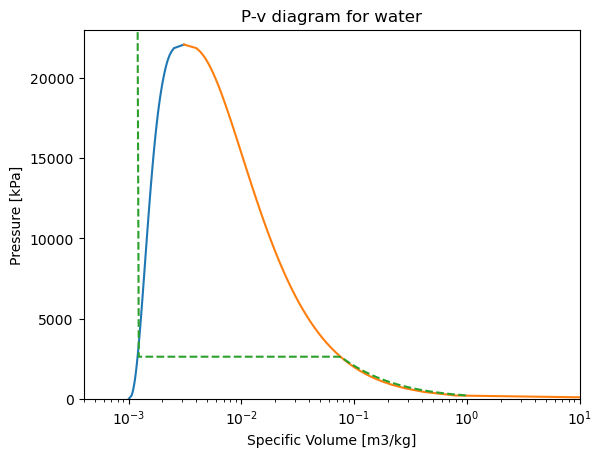

In [5]:
# Make an array of Pressure...
PP = np.linspace(1,22064, num=100) # note that weird things happen if you go too high or too low since there is no data there
svf_P = 1/CP.PropsSI('D','P',PP*1000,'Q',0,'Water')
svg_P = 1/CP.PropsSI('D','P',PP*1000,'Q',1,'Water')

# Make an isobar:
T = 500 #[K]
sv = np.logspace(-4,0,num=100)
P_T500 = CP.PropsSI('P','T',T,'D',1/sv,'Water')/1000 # 500K isotherm data

# Plot these values on a Tv diagram
fig, ax = plt.subplots()
ax.semilogx(svf_P,PP)
ax.semilogx(svg_P,PP)
ax.semilogx(sv,P_T500,'--')
plt.xlim([4e-4,10])
plt.ylim([0,23000])
plt.title('P-v diagram for water')
plt.xlabel('Specific Volume [m3/kg]')
plt.ylabel('Pressure [kPa]')
plt.show()